<a href="https://colab.research.google.com/github/schmelto/machine-learning/blob/main/Deeplearning/Loading_and_editing_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading and editing MNIST

## Import from TensorFlow, Keras and Numpy

Before we can use the full functionality of NumPy, we first have to import the library. With the abbreviation "as" we give numpy a "nickname" and from now on we can write `np.some_function ()` for all functions of Numpy.

Keras offers us an easy way to load the MNIST data set, since this is already integrated as one of the data sets in Keras.

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

## Load MNIST data set

We can easily define our data by specifying the data record and load it with a simple function.
We get 2 different tuples back from the function, on the one hand the training data (images + label) and on the other hand the test data (also images + label).

In [2]:
# Specify the record
data = keras.datasets.mnist

# Download data set, split the data into test and training data
(train_images, train_labels), (test_images, test_labels) = data.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In the following we want to display the size of the loaded data
- Loaded data are numpy arrays
   - 3D matrices
- 60,000 and 10,000 images of size $28\cdot8=784$ pixels

In [3]:
# Size of the training data (length, height and depth of the numpy array)
print(train_images.shape)
# Size of the test data (length, height and depth of the numpy array)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


The pixels are values from 0 to 255. We want to validate this below.

In [4]:
# Minima and maxima of the matrix
print(np.min(train_images))
print(np.max(train_images))

0
255


## Manipulation of the data
If we only need a small section of the data or want to learn with less data, we can reduce the input array.

In [5]:
train_images = train_images[:1000]

# Size of the new training data set (length, height and depth of the numpy array)
print(train_images.shape)

(1000, 28, 28)


## Necessary transformation for use in Keras

We expect the desired output of the network (label) as a vector of size 10. Each entry in this vector should stand for a number from 0-9. A 5 would therefore contain a 1 in the 6th position and all other values would be 0.

The labels from the MNIST data set are just simple numbers at the beginning and must therefore be converted by us:
- The picture of the handwritten 5 has the label `5`
- However, we want the following value: `[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.] `

In [6]:
# Old label is the number of the class
# Example: The picture with the handwritten 5 has the label 5
print(f"Label before: {train_labels[0]}")

# Reshaping of the label to a vector
# This vector has a 1 at position 5 (starting with 0) and 0 everywhere else

# Have 10 classes (numbers from 0-9) and thus 10 neurons for output
total_classes = 10
# Auxiliary function for carrying out the vectorization
train_labels_vectorized = keras.utils.to_categorical(train_labels, total_classes)
print(f"Label afterwards: {train_labels_vectorized[0]}")

Label before: 5
Label afterwards: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


## Display images from the data set

The library `matplotlib`, for example, is suitable for a more detailed inspection of this and other data records.

In [7]:
import matplotlib.pyplot as plt
# Magic command for using matplotlib in local jupyter notebooks
%matplotlib inline

We had already made a few small changes to the loaded data. We want to undo this by reloading the data in order to then work with the actual data.

In [8]:
# Reload the test and training data
(train_images, train_labels), (test_images, test_labels) = data.load_data()

We now want to display the individual images of the MNIST data set and an associated legend in order to get a feel for the data.

In this way, incorrectly classified images of the network can be displayed later.

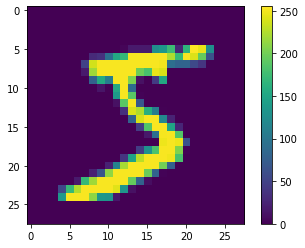

In [9]:
plt.imshow(train_images[0])
plt.colorbar()
plt.show()

We want normalized pixel values between 0 and 1 for training our network. We achieve this by dividing each entry in the `train_images` by 255.

In [10]:
normalized_train_images = train_images / 255

We also want to output the result of normalization and use the legend to see our success.

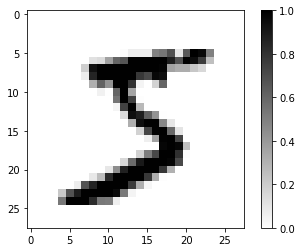

In [11]:
# We use "binary" as the colormap (cmap) because we only want to interpolate between white and black
plt.imshow(normalized_train_images[0], cmap=plt.cm.binary)
plt.colorbar()
plt.show()

## edit data record (add noise)

We create a matrix of size 28 x 28 with values between 0 and 1 (command should be known from NumPy Video). We want to add the randomly generated matrix to the training image of the same size in order to add noise to the image.

Using this noise, we generated a new image that we could use to train our network.


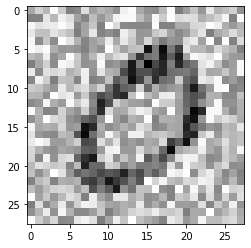

In [12]:
# Noise can be chosen arbitrarily by choosing the random generator
noise_matrix = np.random.random((28,28))
# Adding the matrix with noise to the original matrix
new_train_data = normalized_train_images[1] + noise_matrix
# Show new picture
plt.imshow(new_train_data, cmap=plt.cm.binary)
plt.show()

## Generate data record values

Another option for editing (expanding) the data record is to use transposition.
`new_train_data = train_images[1].T` creates a 0 mirrored on the diagonal, which should still be classified as 0, but looks different due to the mirroring.

The function `np.rot90` enables us to rotate pictures by multiples of 90° and in this way generate new data. A 0 that has been rotated 180°, i.e. is upside down, should still be classified as a 0.

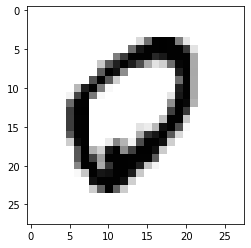

In [13]:
# 2-fold rotation by 90° (upside down 0)
flipped_zero = np.rot90(normalized_train_images[1])
flipped_zero = np.rot90(flipped_zero)

# Show new picture
plt.imshow(flipped_zero, cmap=plt.cm.binary)
plt.show()

Then we want to attach the newly generated image to the existing data record.
For this, both nd arrays, which we attach to each other, must have the same dimension (size). So we shape flipped_zero from a 2D array to a 3D array.

In [14]:
# flipped_zero wird zu Array der Länge 1 mit einer 28x28 Matrix
flipped_zero = flipped_zero.reshape(1,28,28)

# Damit können wir das 1x28x28 flipped_zero Array mit dem 60000x28x28 train_images Array zusammenfügen
extended_train_images = np.append(normalized_train_images, flipped_zero, axis=0)
print(extended_train_images.shape)

(60001, 28, 28)
